# Configure Enviroment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython import display
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [3]:
!pip install ultralytics
display.clear_output()

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [5]:
# set configuration
class Args:
    project_path = '/content/drive/MyDrive/Papaya-counter/'
    dataset_path = os.path.join(project_path, 'dataset.zip')
    project = 'complete_train'
    config_train = 'config.yaml'
    model = 'yolo11m'
    epochs = 200
    batch = 16
    test_image_path = os.path.join(project_path, 'Teste_Imagem.JPG')

    yolo_project = f'{project}/{model}'

args = Args()

# Prepare the dataset folder and configuration

In [ ]:
!unzip $args.dataset_path -d /content/
display.clear_output()

In [ ]:
# Path for config.yaml
config_path = os.path.join(args.project_path, 'config.yaml')
!cp $config_path /content/

# Model training

In [ ]:
model = YOLO(f"{args.model}.yaml")
model.to('cuda')

# Train
model.train(
    data=args.config_train,
    epochs=args.epochs,
    imgsz=640,
    batch=args.batch,
    project=args.yolo_project,
    freeze=10,
    patience=25,
    plots=True,
)

# Load a pre-trained model

In [ ]:
pretrained_model_path = os.path.join(
                            args.project_path,
                            'results',
                            args.yolo_project,
                            'train/weights/best.pt'
                        )

# Load a model
model = YOLO(
    pretrained_model_path
)

print(f'\n\nTEST ON {args.config_train}\n\n')

# Validate the model
metrics = model.val(
    data=args.config_train,
    imgsz=640,
    batch=1,
    iou=0.5,
    max_det=None,
    augment=False,
    device='cuda:0',
    split='test',
    project=args.yolo_project
)

# Desafio 1

Para o Desafio Essencial, o(a) candidato(a) terá que entregar o código
elaborado, além de um print da quantidade total de mamões na imagem
disponibilizada;


image 1/1 /content/drive/MyDrive/Papaya-counter/Teste_Imagem.JPG: 448x640 32 Papayas, 1105.8ms
Speed: 2.8ms preprocess, 1105.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


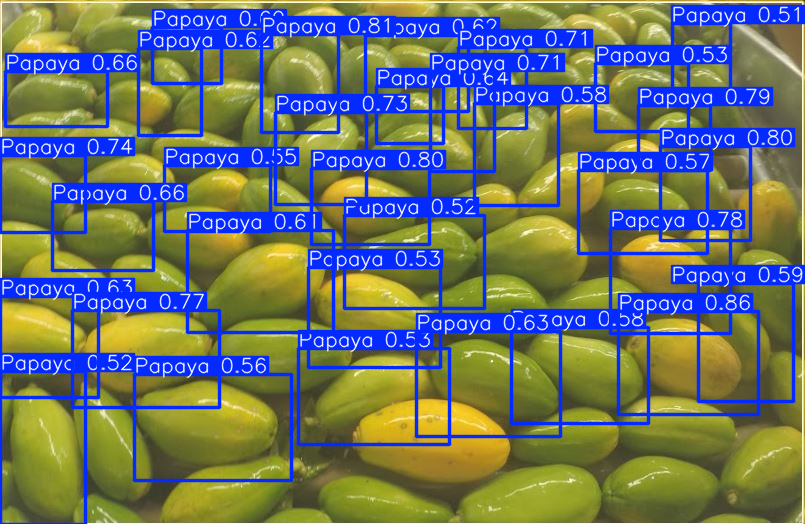

In [9]:
pretrained_model_path = os.path.join(
                            args.project_path,
                            'results',
                            args.yolo_project,
                            'train/weights/best.pt'
                        )

# Load a model
model = YOLO(
    pretrained_model_path,
)

results = model(
    args.test_image_path,
    imgsz=640,
    conf=0.5
)

# Process results list
for result in results:
    boxes = result.boxes
    result.show()

In [14]:
Quantidade_papaya = len(boxes)

print(f'A imagem possui um total de {Quantidade_papaya} mamões')

A imagem possui um total de 32 mamões
